#1)O problema da classificação com multiclasses:
Discutiremos aqui o problema de classificação multiclasses para os classificadores já vistos na disciplina: Naive Bayes, Linear discriminant analysis, quadratic discriminant analysis e SVM. Foram analisados problemas em que a classificação assumia 2 valores, as chamadas classes negativas e classes positivas (0 e 1), mas isto é um caso específico para a generalização dos problemas - podem haver inúmeras classes para um mesmo problema. Pensemos por exemplo no caso de identificação de escrita numérica no aprendizado supervisionado: este não é um problema de classificação binária. Será necessário diferenciar os algarismos de 1 à 9, ou seja, multiclasses.
##1.1)Naive Bayes, LDA, QDA:
Para estes três classificadores, podemos dizer que, em suas teorias, a formulação multiclasses já está incluída. Veremos isto revisando os princípios teóricos de cada um.
No caso do Naive Bayes, há a hipótese de independência das variáveis. São apresentadas n entradas:
$(x_{1}, ..., x_{n})$ com c possíveis classificações, podendo a entrada assumir a classificação $Y = c$. É atribuida assim uma probabilidade condicional (por isso o nome de Naive Bayes) $P(Y = c / x) = \dfrac{P(X=x / Y = c)P(Y=c)}{∑P(X=x / Y = s) P(Y=s)}$ \\
Com a distribuição normal associada:
$(X_{j} / Y = c)$ ~ $N(\mu_{jc},\sigma^{2}_{jc})$ com 
Percebe que aqui já está embutido naturalmente que podem haver c possíveis classificações, e não só classificação binária. Já para o LDA, assumem-se distribuições com médias diferentes, mas a mesma matriz de covariância, e não o princípio de independência das variáveis. Para a saída podendo assumir uma classificação $Y = c$, tem-se que:
$(\vec X = (x_{1},...,x_{d}) / Y = c)$ ~$Normal(\mu_{c},∑)$ \\
Veja novamente que Isto é generalizado para $c$ classes diferentes, e não apenas 2 delas. Por último, no caso do QDA, segue-se a mesma lógica para o LDA, entretanto agora com a normalidade multivariada, cada distribuição condicional pode ter sua própria matriz de covariância:
$(\vec X = (x_{1},...,x_{d}) / Y = c)$ ~ $Normal(\mu_{c},∑_{c})$ \\
Em que Y pode assumir $c$ classes diferentes. A intenção aqui não é fazer uma descrição detalhada de cada método, e sim discutir brevemente que a classificação multiclasses já está incluída na teoria geral do NB,QDA,LDA. No final das contas, para estes, que se encontrar a probabilidade que maximiza encontrar uma determinada classe dada a distribuição de probabilidades assumida pelos dados, e isso generaliza as $c$ classes. O sklearn no Python já generaliza estes classificadores para o caso multiclasse, basta especificar (como veremos na parte computacional do trabalho para MC), os dataframes.

##1.2)SVM:
SVM é um algoritmo de aprendizado supervisionado utilizado em problemas de classificação e regressão. Simplificando a explicação de seu funcionamento, o SVM faz certas transformações nos dados dependendo da função do Kernel selecionada e com base nessas transformações ele tenta maximizar os limites de separação das classes que foram definidas. Generalizando, o objetivo é encontrar um hiperplano que maximize a separação dos pontos de dados para suas potenciais classes em um espaço n-dimensional. A princípio, o SVM não oferece um "suporte" à classificação multiclasses, logo no problema multiclasses, este é resolvido "quebrando" as multiclasses em problemas de classificação binária: OvO & OvA.
##1.3)One-versus-One (OvO):
OvO é um algoritmo de estratégia para resolver problemas de classificação multiclasses. Para cada par de classes, será treinado um classificador com intenção de comparar estas. Para k classes, serão testados $\dfrac{k(k-1)}{2}$ pares de classes, ou seja, treinados $\dfrac{k(k-1)}{2}$. Dado isso, ela pode ser dita como mais custosa computacionalmente, pela quantidade de pares testados, e que uma nova observação testada é testada com todos os classificadores, recebendo votos associados à classificação escolhida. Pode-se dizer que a classe vai acumulando esses votos, e no final a que tiver mais votos é a classe escolhida para o feature. Isto é, OvO quebra o problema de MC em múltiplos problemas de classificação binária, associando um classificador binário por cada par de classes.
##1.4)One-versus-all (OvA):
Aqui neste caso, o algoritmo é até mais interpretável por ser semelhante à forma como nosso cérebro faz associações. São treinados k classificadores para k classes, e subsequentemente vai se comparando uma classe a todo o resto, ou seja, uma nova observação do conjunto teste é testada para cada classificador, sendo associada uma probabilidade/score para cada classe. Podemos pensar que se assemelha à aprendermos a diferenciar os números: quando vemos uma imagem do número 1, comparamos mentalmente a todos os outros números que conhecemos, e no final fazemos uma associação para qual ele se assemelha mais ao que conhecemos. O OvA pode ser definido como mais eficiente computacionalmente pois aqui não são testados $\dfrac{k(k-1)}{2}$ pares de classes e sim k classes.


Tentei fazer uma explicação mais objetiva de cada um destes para MC, pois a parte computacional será vista e resultados discutidos no final do código!

#2)Problema de classificação binária: Tem ou não tem vulcão?
Neste trabalho, utilizamos os dados de uma sonda lançada ao redor de Vênus, a Magellan da NASA. Essa sonda realiza um mapeamento da superfície do planeta e assim armazena imagens - milhares delas - que contém informações da superfície. Um dos problemas ao se mapear a superfície de um planeta, é categorizar certas informações contidas nas imagens. Como mencionado, são milhares e milhares de imagens, então o uso de um programa de aprendizado supervisionado que realiza previsões de determinadas características pode ser muito útil ao ser obter novos mapeamentos. Por exemplo, se houver um objetivo de pousar a sonda na superfície, é importante saber a localização, e se há ali na região um vulcão, dado que Vênus possui inúmeros vulcões. O primeiro problema será um problema de classificação binária supervisionado, onde utilizamos os dados de imagens da Magellan e tentamos prever se há ou não um vulcão naquela região. Serão utilizados os classificadores Naive Bayes, Linear discriminant anlysis, Quadratic discriminant analysis e SVM. A validação cruzada é feita nos classificadores.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
import sklearn.metrics as sklm
import numpy as np
from sklearn import metrics
from google.colab import drive
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,denoise_wavelet, estimate_sigma)
from skimage.morphology import reconstruction
from skimage.feature import hog
from skimage import exposure
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [ ]:
#Pareando o google drive com o Colab para fazer upload dos arquivos
drive.mount('/content/drive')

Mounted at /content/drive


Fazendo o upload dos arquivos

In [ ]:
feat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_images.csv', header = None) 
resp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_labels.csv')
#por conveniência, convertemos os pixels 0-255 para 0-1

feat = feat/255
feat_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_images.csv', header = None)
feat_test = feat_test/255
resp_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_labels.csv')

Podemos ver abaixo uma amostra do dataframe de resp. Ele nos mostra se há ou não vulcão, o tipo, o raio e o número de vulcões

In [ ]:
resp.head()

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


Antes de começar a fazer o uso de qualquer classificador, devemos entrar no pré-processamento de dados, principalmente porquê estamos lidando com imagens muito ruidosas, tais ruidos que podem afetar o treino e teste na classificação. Nas célculas abaixo, entramos no pré-processamento de dados

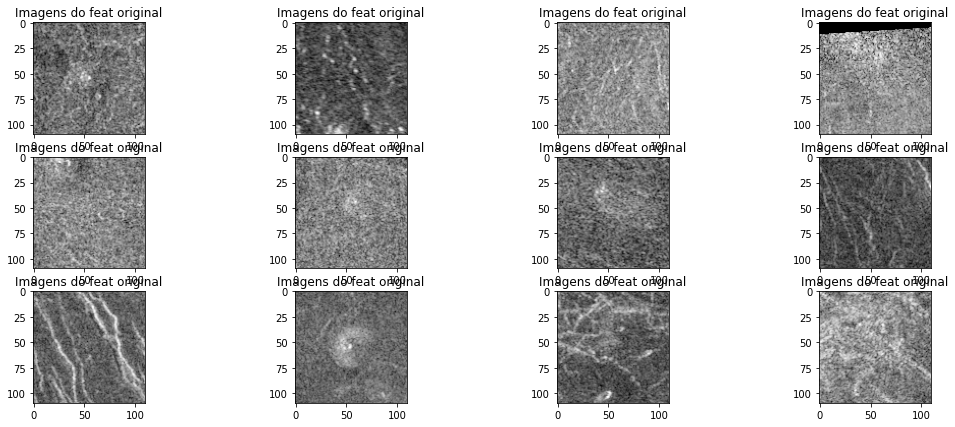

In [ ]:
# Visualizando parte das imagens originais

fig, axs = plt.subplots(3, 4)
fig.set_size_inches(18, 7)
ind = 0

for ax in axs.flat:
    img = np.array(feat.iloc[ind]).reshape((110,110))
    ax.imshow(img, cmap = 'gray')
    ax.set_title('Imagens do feat original')
    ind += 1

In [ ]:
# Enxergamos imagens, mas estas imagens nada mais são além de um dataframe que "esmaga" os pixeis da imagem.
#Cada linha do dataframe representa uma imagem

feat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12060,12061,12062,12063,12064,12065,12066,12067,12068,12069,12070,12071,12072,12073,12074,12075,12076,12077,12078,12079,12080,12081,12082,12083,12084,12085,12086,12087,12088,12089,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,0.372549,0.396078,0.388235,0.403922,0.372549,0.337255,0.376471,0.349020,0.274510,0.407843,0.450980,0.376471,0.349020,0.400000,0.427451,0.423529,0.400000,0.407843,0.372549,0.356863,0.392157,0.388235,0.380392,0.392157,0.419608,0.427451,0.384314,0.384314,0.368627,0.384314,0.400000,0.341176,0.321569,0.368627,0.411765,0.364706,0.400000,0.419608,0.384314,0.411765,...,0.396078,0.372549,0.411765,0.403922,0.290196,0.345098,0.415686,0.435294,0.352941,0.376471,0.396078,0.352941,0.380392,0.400000,0.380392,0.415686,0.423529,0.419608,0.364706,0.290196,0.415686,0.450980,0.419608,0.400000,0.356863,0.403922,0.435294,0.411765,0.454902,0.458824,0.435294,0.419608,0.360784,0.349020,0.403922,0.388235,0.458824,0.454902,0.462745,0.376471
1,0.356863,0.360784,0.356863,0.349020,0.360784,0.364706,0.376471,0.396078,0.419608,0.407843,0.360784,0.317647,0.298039,0.325490,0.345098,0.364706,0.356863,0.360784,0.364706,0.352941,0.325490,0.317647,0.309804,0.329412,0.337255,0.341176,0.360784,0.364706,0.368627,0.368627,0.341176,0.325490,0.372549,0.376471,0.368627,0.356863,0.364706,0.376471,0.364706,0.341176,...,0.372549,0.356863,0.356863,0.349020,0.345098,0.352941,0.345098,0.364706,0.372549,0.415686,0.443137,0.454902,0.423529,0.368627,0.360784,0.376471,0.388235,0.360784,0.341176,0.349020,0.411765,0.466667,0.474510,0.454902,0.435294,0.443137,0.439216,0.403922,0.396078,0.403922,0.403922,0.360784,0.364706,0.372549,0.384314,0.411765,0.407843,0.392157,0.352941,0.317647
2,0.341176,0.274510,0.282353,0.290196,0.329412,0.305882,0.364706,0.407843,0.415686,0.415686,0.368627,0.309804,0.376471,0.345098,0.337255,0.349020,0.384314,0.368627,0.298039,0.305882,0.356863,0.376471,0.337255,0.278431,0.321569,0.298039,0.282353,0.317647,0.352941,0.329412,0.317647,0.274510,0.294118,0.356863,0.317647,0.317647,0.360784,0.368627,0.309804,0.380392,...,0.337255,0.313725,0.325490,0.364706,0.368627,0.356863,0.352941,0.368627,0.376471,0.305882,0.345098,0.372549,0.474510,0.423529,0.345098,0.341176,0.349020,0.392157,0.388235,0.345098,0.419608,0.423529,0.396078,0.345098,0.372549,0.317647,0.223529,0.329412,0.349020,0.360784,0.329412,0.278431,0.372549,0.400000,0.368627,0.313725,0.356863,0.313725,0.329412,0.352941
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.396078,0.447059,0.407843,0.403922,0.317647,0.368627,0.423529,0.376471,0.309804,0.443137,0.443137,0.447059,0.439216,0.419608,0.431373,0.439216,0.384314,0.298039,0.329412,0.380392,0.388235,0.372549,0.266667,0.380392,0.356863,0.380392,0.376471,0.325490,0.392157,0.415686,0.368627,0.317647,0.349020,0.329412,0.313725,0.352941,0.360784,0.313725,0.345098,0.376471
4,0.447059,0.462745,0.486275,0.466667,0.372549,0.462745,0.411765,0.454902,0.482353,0.439216,0.431373,0.443137,0.466667,0.439216,0.411765,0.474510,0.458824,0.490196,0.533333,0.552941,0.470588,0.470588,0.505882,0.529412,0.517647,0.486275,0.427451,0.494118,0.443137,0.431373,0.415686,0.419608,0.443137,0.454902,0.482353,0.396078,0.388235,0.349020,0.317647,0.396078,...,0.411765,0.454902,0.447059,0.403922,0.447059,0.427451,0.443137,0.494118,0.431373,0.329412,0.360784,0.435294,0.447059,0.490196,0.478431,0.427451,0.443137,0.435294,0.474510,0.466667,0.403922,0.447059,0.462745,0.462745,0.423529,0.435294,0.427451,0.392157,0.396078,0.411765,0.454902,0.443137,0.400000,0.364706,0.427451,0.407843,0.415686,0.458824,0.435294,0.450980


Perceba que as imagens não são muito espaçadas com relação aos 0 e 1 que há no Dataframe. Há muito ruído, e uma visualização precária das regiões onde há ou não um vulcão. Para tentar melhorar a qualidade das imagens, pensei em 2 questões principais como uma iniciante de processamento de imagens: (1) O ruído deverá ser tratado com algum processamento de Denoising, (2) Um processamento que acentua os picos na imagem pode nos ser útil, dado que os vulcões são protuberâncias na superfície \\
Nas células abaixo farei um processamento: o peaks + denoising do Sklearn (find_peaks e denoise_tv_chambolle) para compararmos depois o rendimento dos classificadores fazendo tais procedimentos \\
Foi feita uma tentativa de utilizar o algoritmo de HOG do sckit-image, entretanto estava ocorrendo um problema nos dataframes que acabavam sendo truncados, e o rendimento dos classificadores não obtinha uma melhora tão significativa, logo resolvi deixar de lado este pré-processamento. Você verá que mesmo um pré-processamento simples como o usado aqui, já fornecerá resultados muito interessantes na hora de avaliar classificações.

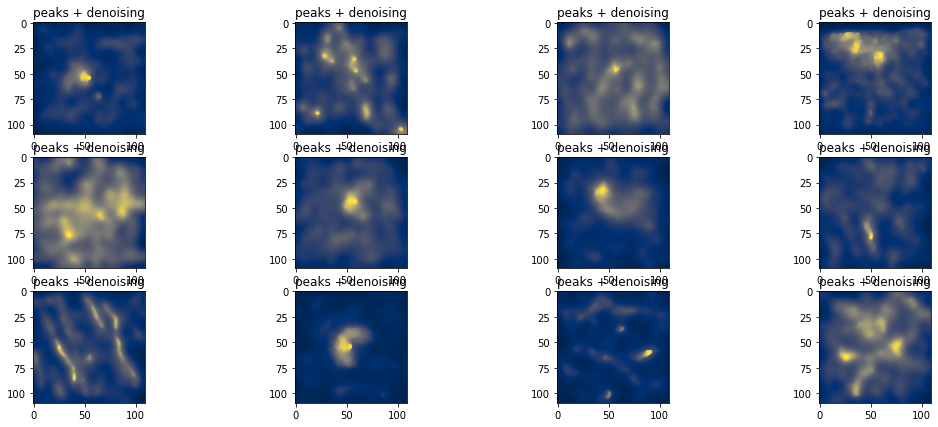

In [ ]:
# Visualização de algumas imagens teste com o pré-processamento

fig, axs = plt.subplots(3, 4)
fig.set_size_inches(18, 7)
ind = 0
for ax in axs.flat:
    image = np.array(feat.iloc[ind]).reshape((110,110))
    seed = np.copy(image)
    seed[1:-1, 1:-1] = image.min()
    mask = image
    rec = reconstruction(seed, mask, method='dilation')
    img = denoise_tv_chambolle(image-rec)
    ax.imshow(img, cmap='cividis')
    ax.set_title('peaks + denoising')
    ind +=1

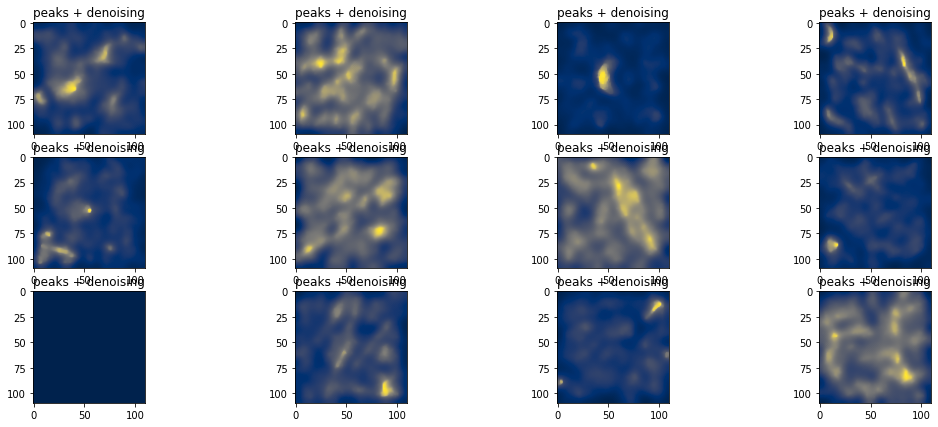

In [ ]:
# Fazemos o mesmo procedimento para as imagens teste

fig, axs = plt.subplots(3, 4)
fig.set_size_inches(18, 7)
ind = 0
for ax in axs.flat:
    image = np.array(feat_test.iloc[ind]).reshape((110,110))
    seed = np.copy(image)
    seed[1:-1, 1:-1] = image.min()
    mask = image
    rec = reconstruction(seed, mask, method='dilation')
    img = denoise_tv_chambolle(image-rec)
    ax.imshow(img, cmap='cividis')
    ax.set_title('peaks + denoising')
    ind +=1

O pré-processamento ainda não está completo, para fazer qualquer uso dos dados das imagens, transformarei os dados em novos Dataframes que serão utilizados posteriormente
Lembrando que o processamento também deve ser feito para os dados de teste!


In [ ]:
### Para o processamento: peaks + denoising

feat_array = np.array([np.array(feat.iloc[i]) for i in range(len(feat))])
images = [np.reshape(feat_array[i],(110,110)) for i in range(len(feat))]
images_proc = []

for image in images:
    seed = np.copy(image)
    seed[1:-1, 1:-1] = image.min()
    mask = image
    rec = reconstruction(seed, mask, method='dilation')
    img = denoise_tv_chambolle(image-rec)
    images_proc.append(img)

X = pd.DataFrame(np.array(images_proc).reshape(7000,110*110))

In [ ]:
### Para o primeiro processamento: peaks + denoising
## teste

feat_array_test = np.array([np.array(feat_test.iloc[i]) for i in range(len(feat_test))])
images = [np.reshape(feat_array_test[i],(110,110)) for i in range(len(feat_test))]
images_proc_teste = []

for image in images:
    seed = np.copy(image)
    seed[1:-1, 1:-1] = image.min()
    mask = image
    rec = reconstruction(seed, mask, method='dilation')
    img = denoise_tv_chambolle(image-rec)
    images_proc_teste.append(img)

X_test = pd.DataFrame(np.array(images_proc_teste).reshape(2734,110*110))

Pronto! Agora temos os dataframes a serem utilizados. Vejamos nas próximas células que de fato está tudo com os tamanhos corretos

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12060,12061,12062,12063,12064,12065,12066,12067,12068,12069,12070,12071,12072,12073,12074,12075,12076,12077,12078,12079,12080,12081,12082,12083,12084,12085,12086,12087,12088,12089,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,0.003171,0.003307,0.003576,0.003960,0.004433,0.004959,0.005502,0.006017,0.006453,0.006760,0.006919,0.006927,0.006802,0.006569,0.006271,0.005934,0.005607,0.005311,0.005080,0.004916,0.004825,0.004798,0.004824,0.004889,0.004977,0.005083,0.005195,0.005304,0.005394,0.005449,0.005467,0.005444,0.005400,0.005338,0.005308,0.005318,0.005413,0.005597,0.005893,0.006288,...,0.006444,0.006450,0.006423,0.006381,0.006345,0.006330,0.006349,0.006391,0.006459,0.006517,0.006562,0.006549,0.006502,0.006369,0.006173,0.005889,0.005584,0.005258,0.004944,0.004636,0.004357,0.004116,0.003939,0.003820,0.003796,0.003820,0.003956,0.004121,0.004386,0.004623,0.004922,0.005169,0.005424,0.005592,0.005727,0.005777,0.005785,0.005755,0.005718,0.005695
1,0.002953,0.002984,0.003038,0.003109,0.003179,0.003239,0.003270,0.003266,0.003224,0.003145,0.003041,0.002915,0.002792,0.002663,0.002558,0.002455,0.002387,0.002324,0.002302,0.002297,0.002342,0.002421,0.002555,0.002741,0.002985,0.003284,0.003635,0.004030,0.004455,0.004897,0.005346,0.005799,0.006264,0.006757,0.007288,0.007887,0.008572,0.009353,0.010216,0.011116,...,0.002198,0.002420,0.002722,0.003090,0.003515,0.003975,0.004443,0.004885,0.005269,0.005565,0.005752,0.005821,0.005796,0.005709,0.005601,0.005514,0.005483,0.005528,0.005672,0.005926,0.006300,0.006795,0.007411,0.008141,0.008959,0.009838,0.010748,0.011734,0.012854,0.014148,0.015632,0.017272,0.018942,0.020089,0.020372,0.020055,0.019253,0.018305,0.017614,0.017286
2,0.001821,0.001843,0.001888,0.001957,0.002052,0.002173,0.002323,0.002500,0.002703,0.002929,0.003176,0.003445,0.003735,0.004044,0.004374,0.004722,0.005085,0.005443,0.005791,0.006124,0.006478,0.006831,0.007191,0.007532,0.007829,0.008049,0.008162,0.008169,0.008078,0.007897,0.007637,0.007279,0.006890,0.006499,0.006130,0.005790,0.005506,0.005272,0.005114,0.005030,...,0.005988,0.005934,0.005883,0.005802,0.005718,0.005603,0.005477,0.005333,0.005186,0.005025,0.004861,0.004688,0.004514,0.004343,0.004187,0.004046,0.003928,0.003833,0.003771,0.003735,0.003739,0.003770,0.003843,0.003941,0.004076,0.004233,0.004415,0.004609,0.004803,0.004978,0.005123,0.005230,0.005285,0.005293,0.005255,0.005183,0.005088,0.004991,0.004913,0.004872
3,0.000043,0.000044,0.000048,0.000050,0.000058,0.000063,0.000076,0.000086,0.000107,0.000122,0.000150,0.000170,0.000198,0.000216,0.000237,0.000248,0.000261,0.000270,0.000283,0.000296,0.000318,0.000344,0.000379,0.000419,0.000467,0.000516,0.000566,0.000607,0.000641,0.000659,0.000669,0.000662,0.000651,0.000628,0.000610,0.000588,0.000574,0.000564,0.000564,0.000573,...,0.005777,0.005741,0.005550,0.005301,0.005011,0.004761,0.004610,0.004587,0.004714,0.004979,0.005325,0.005708,0.006005,0.006258,0.006327,0.006291,0.006085,0.005842,0.005542,0.005302,0.005081,0.004980,0.004904,0.004947,0.004989,0.005130,0.005247,0.005460,0.005628,0.005864,0.005982,0.006030,0.005907,0.005675,0.005298,0.004894,0.004389,0.003954,0.003610,0.003442
4,0.005274,0.005230,0.005132,0.004994,0.004801,0.004609,0.004406,0.004236,0.004076,0.003969,0.003905,0.003903,0.003962,0.004089,0.004291,0.004574,0.004941,0.005390,0.005915,0.006501,0.007122,0.007757,0.008363,0.008846,0.009176,0.009414,0.009590,0.009728,0.009857,0.009999,0.010168,0.010356,0.010519,0.010600,0.010570,0.010398,0.010087,0.009651,0.009113,0.008489,...,0.006085,0.006030,0.006061,0.006128,0.006249,0.006362,0.006476,0.006545,0.006569,0.006537,0.006455,0.006328,0.006166,0.005979,0.005775,0.005563,0.005349,0.005138,0.004934,0.004745,0.004576,0.004431,0.004310,0.004212,0.004134,0.004071,0.004018,0.003970,0.003925,0.003874,0.003824,0.003759,0.003688,0.003607,0.003533,0.003456,0.003391,0.003332,0.003290,0.003267


In [ ]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12060,12061,12062,12063,12064,12065,12066,12067,12068,12069,12070,12071,12072,12073,12074,12075,12076,12077,12078,12079,12080,12081,12082,12083,12084,12085,12086,12087,12088,12089,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,0.003113,0.003104,0.003081,0.003049,0.003000,0.002965,0.002928,0.002930,0.002949,0.003016,0.003107,0.003252,0.003426,0.003639,0.003869,0.004109,0.004341,0.004538,0.004702,0.004837,0.004981,0.005115,0.005258,0.005390,0.005507,0.005586,0.005637,0.005654,0.005689,0.005719,0.005809,0.005932,0.006124,0.006343,0.006592,0.006823,0.006994,0.007063,0.007013,0.006841,...,0.007565,0.007469,0.007331,0.007176,0.007027,0.006881,0.006741,0.006588,0.006415,0.006214,0.005994,0.005776,0.005575,0.005401,0.005258,0.005149,0.005068,0.005009,0.004966,0.004931,0.004903,0.004873,0.004842,0.004804,0.004760,0.004705,0.004643,0.004572,0.004493,0.004402,0.004301,0.004184,0.004056,0.003915,0.003771,0.003629,0.003502,0.003394,0.003318,0.003278
1,0.002817,0.002816,0.002805,0.002804,0.002786,0.002785,0.002771,0.002774,0.002770,0.002785,0.002809,0.002859,0.002937,0.003055,0.003218,0.003432,0.003699,0.004011,0.004358,0.004720,0.005068,0.005365,0.005576,0.005651,0.005642,0.005539,0.005390,0.005182,0.004955,0.004697,0.004445,0.004185,0.003961,0.003749,0.003606,0.003509,0.003522,0.003614,0.003827,0.004136,...,0.007139,0.007124,0.006986,0.006723,0.006360,0.005941,0.005514,0.005122,0.004795,0.004552,0.004398,0.004334,0.004342,0.004413,0.004521,0.004649,0.004770,0.004869,0.004921,0.004926,0.004882,0.004792,0.004662,0.004501,0.004321,0.004129,0.003935,0.003746,0.003564,0.003385,0.003210,0.003032,0.002853,0.002672,0.002496,0.002331,0.002182,0.002061,0.001975,0.001932
2,0.002132,0.002207,0.002355,0.002570,0.002841,0.003152,0.003491,0.003844,0.004193,0.004524,0.004824,0.005094,0.005339,0.005571,0.005795,0.006041,0.006320,0.006640,0.006986,0.007334,0.007641,0.007859,0.007945,0.007886,0.007684,0.007382,0.006980,0.006498,0.005934,0.005409,0.004883,0.004436,0.004014,0.003681,0.003382,0.003170,0.003002,0.002916,0.002885,0.002928,...,0.004379,0.004327,0.004283,0.004279,0.004286,0.004345,0.004414,0.004548,0.004711,0.004961,0.005263,0.005664,0.006127,0.006669,0.007259,0.007890,0.008519,0.009088,0.009411,0.009555,0.009587,0.009507,0.009349,0.009160,0.008946,0.008753,0.008504,0.008297,0.007969,0.007584,0.007112,0.006610,0.006079,0.005537,0.005010,0.004537,0.004137,0.003821,0.003596,0.003482
3,0.006383,0.006824,0.007741,0.009120,0.010645,0.012292,0.013996,0.015365,0.015975,0.015785,0.014887,0.013471,0.011737,0.009931,0.008164,0.006580,0.005190,0.004073,0.003181,0.002557,0.002130,0.001913,0.001841,0.001911,0.002076,0.002324,0.002623,0.002956,0.003296,0.003618,0.003901,0.004112,0.004241,0.004261,0.004220,0.004087,0.003948,0.003771,0.003623,0.003485,...,0.007072,0.007754,0.008413,0.008981,0.009376,0.009546,0.009495,0.009252,0.008873,0.008428,0.007985,0.007591,0.007272,0.007027,0.006851,0.006719,0.006624,0.006538,0.006460,0.006379,0.006309,0.006260,0.006254,0.006296,0.006398,0.006549,0.006732,0.006910,0.007042,0.007087,0.007017,0.006814,0.006480,0.006035,0.005526,0.005005,0.004518,0.004105,0.003808,0.003656
4,0.001307,0.001327,0.001373,0.001426,0.001495,0.001560,0.001626,0.001694,0.001755,0.001842,0.001922,0.002055,0.002192,0.002393,0.002609,0.002892,0.003192,0.003561,0.003956,0.004421,0.004911,0.005465,0.005939,0.006434,0.006869,0.007341,0.007743,0.008074,0.008285,0.008395,0.008369,0.008233,0.007947,0.007599,0.007197,0.006803,0.006424,0.006100,0.005855,0.005711,...,0.006693,0.006988,0.007095,0.007050,0.006895,0.006692,0.006497,0.006341,0.006240,0.006191,0.006189,0.006215,0.006251,0.006282,0.006289,0.006265,0.006194,0.006075,0.005881,0.005626,0.005316,0.004976,0.004635,0.004321,0.004049,0.003842,0.003690,0.003615,0.003579,0.003614,0.003670,0.003777,0.003878,0.003991,0.004071,0.004132,0.004157,0.004162,0.004153,0.004146


In [ ]:
feat_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12060,12061,12062,12063,12064,12065,12066,12067,12068,12069,12070,12071,12072,12073,12074,12075,12076,12077,12078,12079,12080,12081,12082,12083,12084,12085,12086,12087,12088,12089,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,0.419608,0.454902,0.423529,0.396078,0.419608,0.427451,0.423529,0.431373,0.392157,0.427451,0.462745,0.450980,0.435294,0.474510,0.447059,0.368627,0.384314,0.392157,0.388235,0.423529,0.439216,0.419608,0.392157,0.345098,0.384314,0.407843,0.419608,0.411765,0.376471,0.368627,0.325490,0.368627,0.380392,0.372549,0.352941,0.376471,0.392157,0.431373,0.427451,0.388235,...,0.396078,0.364706,0.356863,0.384314,0.423529,0.392157,0.411765,0.415686,0.407843,0.423529,0.392157,0.368627,0.392157,0.407843,0.407843,0.423529,0.450980,0.454902,0.376471,0.388235,0.427451,0.447059,0.458824,0.462745,0.474510,0.462745,0.431373,0.403922,0.443137,0.454902,0.435294,0.431373,0.427451,0.427451,0.396078,0.415686,0.415686,0.458824,0.509804,0.525490
1,0.364706,0.372549,0.384314,0.392157,0.352941,0.392157,0.423529,0.384314,0.352941,0.403922,0.419608,0.364706,0.352941,0.356863,0.407843,0.443137,0.407843,0.400000,0.443137,0.423529,0.392157,0.411765,0.380392,0.400000,0.450980,0.431373,0.431373,0.407843,0.364706,0.423529,0.407843,0.360784,0.341176,0.419608,0.443137,0.368627,0.286275,0.317647,0.325490,0.345098,...,0.360784,0.345098,0.325490,0.372549,0.415686,0.400000,0.372549,0.376471,0.411765,0.427451,0.435294,0.466667,0.431373,0.364706,0.329412,0.349020,0.380392,0.474510,0.462745,0.396078,0.376471,0.372549,0.427451,0.509804,0.474510,0.349020,0.349020,0.392157,0.454902,0.427451,0.337255,0.364706,0.231373,0.345098,0.349020,0.349020,0.360784,0.388235,0.360784,0.443137
2,0.423529,0.423529,0.360784,0.454902,0.454902,0.549020,0.494118,0.407843,0.439216,0.403922,0.419608,0.419608,0.392157,0.454902,0.419608,0.462745,0.458824,0.474510,0.431373,0.372549,0.415686,0.470588,0.439216,0.415686,0.407843,0.352941,0.462745,0.458824,0.462745,0.517647,0.509804,0.462745,0.427451,0.443137,0.419608,0.552941,0.584314,0.545098,0.509804,0.580392,...,0.486275,0.533333,0.521569,0.454902,0.490196,0.435294,0.443137,0.439216,0.384314,0.407843,0.415686,0.313725,0.517647,0.498039,0.478431,0.439216,0.423529,0.427451,0.462745,0.443137,0.443137,0.419608,0.458824,0.509804,0.439216,0.450980,0.470588,0.470588,0.478431,0.462745,0.462745,0.435294,0.443137,0.419608,0.419608,0.474510,0.552941,0.627451,0.513725,0.541176
3,0.647059,0.643137,0.611765,0.623529,0.592157,0.470588,0.403922,0.447059,0.447059,0.454902,0.372549,0.341176,0.317647,0.254902,0.274510,0.270588,0.270588,0.278431,0.317647,0.294118,0.282353,0.345098,0.341176,0.403922,0.380392,0.301961,0.215686,0.317647,0.356863,0.388235,0.341176,0.282353,0.270588,0.341176,0.345098,0.352941,0.407843,0.341176,0.301961,0.392157,...,0.321569,0.313725,0.321569,0.352941,0.305882,0.294118,0.278431,0.290196,0.356863,0.337255,0.388235,0.372549,0.384314,0.349020,0.270588,0.250980,0.317647,0.349020,0.341176,0.329412,0.337255,0.352941,0.376471,0.415686,0.392157,0.313725,0.305882,0.325490,0.364706,0.352941,0.270588,0.376471,0.427451,0.356863,0.368627,0.325490,0.188235,0.270588,0.337255,0.294118
4,0.411765,0.415686,0.329412,0.450980,0.474510,0.403922,0.368627,0.423529,0.403922,0.356863,0.372549,0.400000,0.352941,0.376471,0.411765,0.360784,0.337255,0.388235,0.400000,0.423529,0.466667,0.462745,0.447059,0.380392,0.368627,0.431373,0.349020,0.290196,0.360784,0.313725,0.325490,0.360784,0.403922,0.392157,0.388235,0.380392,0.349020,0.360784,0.400000,0.396078,...,0.247059,0.356863,0.392157,0.384314,0.384314,0.423529,0.419608,0.345098,0.298039,0.317647,0.301961,0.341176,0.317647,0.352941,0.341176,0.274510,0.301961,0.392157,0.407843,0.376471,0.329412,0.376471,0.376471,0.376471,0.349020,0.352941,0.400000,0.384314,0.341176,0.282353,0.360784,0.349020,0.376471,0.349020,0.356863,0.400000,0.388235,0.352941,0.352941,0.286275


Treino/teste e classificação (NB, LDA, QDA):
Nas próximas células farei o treino destes 3 classificadores, comparando os valores de treino para os pré-processamentos feitos, a fins didáticos de comparação. Para tal, vamos trazer do sckit-learn os módulos para NB,LDA,QDA, e realizar a validação cruzada. Feito isso, analisaremos os valores de ROC score e score f1.

In [ ]:
# Para os dados originais

NB = GaussianNB()
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
NB.fit(feat, resp['Volcano?'])
LDA.fit(feat, resp['Volcano?'])
QDA.fit(feat, resp['Volcano?'])

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [ ]:
# Para os dados originais
# ROC score (NB, LDA, QDA)

print(cross_val_score(NB, feat, resp['Volcano?'], cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True)).mean())

print(cross_val_score(LDA, feat, resp['Volcano?'], cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True)).mean())

print(cross_val_score(QDA, feat, resp['Volcano?'], cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True)).mean())

0.54742875
0.8843066666666667


/home/misabellerv/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/misabellerv/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/misabellerv/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/misabellerv/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/misabellerv/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.74325


Há alguns warnings na hora de o programa rodar os algoritmos para o QDA e LDA. Acredita-se que o Sklearn esteja encontrando algum tipo de problema na hora de procedimentos de inversão de matriz, mas esteja, de alguma forma, contornando-os, e por isso apresenta essa imensa quantidade de warnings.

In [ ]:
# Para os dados originais
# f1 score (NB, LDA, QDA)

print(cross_val_score(NB, feat, resp['Volcano?'], cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())

print(cross_val_score(LDA, feat, resp['Volcano?'], cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())

print(cross_val_score(QDA, feat, resp['Volcano?'], cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())

0.2647270497704949
0.644205194581081


/home/misabellerv/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/misabellerv/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/misabellerv/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/misabellerv/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/misabellerv/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.3937139610121617


In [ ]:
# Para o pré-processamento (peaks + denoising)

NB.fit(X, resp['Volcano?'])
LDA.fit(X, resp['Volcano?'])
QDA.fit(X, resp['Volcano?'])

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [ ]:
# Para o pré-processamento (peaks + denoising)
# ROC score (NB, LDA, QDA)

print(cross_val_score(NB, X, resp['Volcano?'], cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True)).mean())

print(cross_val_score(LDA, X, resp['Volcano?'], cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True)).mean())

print(cross_val_score(QDA, X, resp['Volcano?'], cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True)).mean())

0.7678474999999998
0.9095700000000001


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.7433333333333334


In [ ]:
# Para o pré-processamento (peaks + denoising)
#f1 score (NB, LDA, QDA)

print(cross_val_score(NB, X, resp['Volcano?'], cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())

print(cross_val_score(LDA, X, resp['Volcano?'], cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())

print(cross_val_score(QDA, X, resp['Volcano?'], cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())

0.5128514522127309
0.736430108649684


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.39378828241133645


Obtivemos acima valores de métricas de avaliação f1 score e curva ROC em média. Dados os valores obtidos, podemos concluir que o LDA será o principal classificador para ser levado adiante para o teste. Por questões didáticas, fazemos isto também para o Naive bayes, dado que ele ganhou em segundo lugar como "melhor classificador" dentre os 3 testados \\
As próximas células utilizam os testes

In [ ]:
y_test_pred_NB = NB.predict(X_test)
y_test_pred_LDA = LDA.predict(X_test)

Podemos observar as matrizes de confusão para visualizar as quantidades principais para métricas de avaliação \\
Será discutido adiante também com qual destas quantidades é necessário se preocupar mais

In [ ]:
CM_NB = sklm.confusion_matrix(resp_test['Volcano?'], y_test_pred_NB)
CM_LDA = sklm.confusion_matrix(resp_test['Volcano?'], y_test_pred_LDA)

Agora vejamos as métricas de avaliação para teste de maneira mais organizada nas próximas células

In [ ]:
#Para LDA

Pop = np.size(resp_test['Volcano?'])
N = np.size(np.where(resp_test['Volcano?'] == 0))
P = np.size(np.where(resp_test['Volcano?'] == 1))

VN_LDA = CM_LDA[0, 0]
FP_LDA = CM_LDA[0, 1]
FN_LDA = CM_LDA[1, 0]
VP_LDA = CM_LDA[1, 1]

In [ ]:
#Para LDA

Prev = P/Pop
Acc_LDA = (VN_LDA + VP_LDA)/Pop

FPR_LDA = FP_LDA/N
TNR_LDA = VN_LDA/N
TPR_LDA = VP_LDA/P
FNR_LDA = FN_LDA/P

FOR_LDA = FN_LDA/(VN_LDA + FN_LDA)
PPV_LDA = VP_LDA/(FP_LDA + VP_LDA)
NPV_LDA = VN_LDA/(VN_LDA + FN_LDA)
FDR_LDA = FP_LDA/(FP_LDA + VP_LDA)

F1_LDA = 2/(1/PPV_LDA + 1/TPR_LDA)

In [ ]:
print('Prevalência LDA:', Prev)
print('Acurácia LDA:', Acc_LDA)
print('Taxa de falsos positivos LDA:', FPR_LDA)
print('Taxa de verdadeiros negativos (Especificidade) LDA:', TNR_LDA)
print('Taxa de verdadeiros positivos (Recall) LDA:', TPR_LDA)
print('Taxa de falsos negativos LDA:', FNR_LDA)
print('F1 Score:', F1_LDA)

Prevalência LDA: 0.15874177029992684
Acurácia LDA: 0.8752743233357717
Taxa de falsos positivos LDA: 0.07130434782608695
Taxa de verdadeiros negativos (Especificidade) LDA: 0.928695652173913
Taxa de verdadeiros positivos (Recall) LDA: 0.5921658986175116
Taxa de falsos negativos LDA: 0.4078341013824885
F1 Score: 0.6011695906432749


In [ ]:
#Para NB

Pop = np.size(resp_test['Volcano?'])
N = np.size(np.where(resp_test['Volcano?'] == 0))
P = np.size(np.where(resp_test['Volcano?'] == 1))

VN_NB = CM_NB[0, 0]
FP_NB = CM_NB[0, 1]
FN_NB = CM_NB[1, 0]
VP_NB = CM_NB[1, 1]

In [ ]:
#Para NB

Prev = P/Pop
Acc_NB = (VN_NB + VP_NB)/Pop

FPR_NB = FP_NB/N
TNR_NB = VN_NB/N
TPR_NB = VP_NB/P
FNR_NB = FN_NB/P

FOR_NB = FN_NB/(VN_NB + FN_NB)
PPV_NB = VP_NB/(FP_NB + VP_NB)
NPV_NB = VN_NB/(VN_NB + FN_NB)
FDR_NB = FP_NB/(FP_NB + VP_NB)

F1_NB = 2/(1/PPV_NB + 1/TPR_NB)

In [ ]:
print('Prevalência NB:', Prev)
print('Acurácia NB:', Acc_NB)
print('Taxa de falsos positivos NB:', FPR_NB)
print('Taxa de verdadeiros negativos (Especificidade) NB:', TNR_NB)
print('Taxa de verdadeiros positivos (Recall) NB:', TPR_NB)
print('Taxa de falsos negativos NB:', FNR_NB)
print('F1 Score:', F1_NB)

Prevalência NB: 0.15874177029992684
Acurácia NB: 0.8540599853694221
Taxa de falsos positivos NB: 0.09608695652173913
Taxa de verdadeiros negativos (Especificidade) NB: 0.9039130434782608
Taxa de verdadeiros positivos (Recall) NB: 0.5898617511520737
Taxa de falsos negativos NB: 0.41013824884792627
F1 Score: 0.562019758507135


Agora, uma discussão importante sobre as métricas de avaliação: Devemos nos importar mais com falsos positivos ou falsos negativos? Se pensarmos no caso da sonda que mapeia a superfície, e em algum momento esta vá a entrar na superfície com algum procedimento de pouso, é importante que NÃO tenha um vulcão ali. É mais problemático se obtivermos um resultado que nos diz "Não tem um vulcão aqui, tudo bem pousar!", do que um "Tem um vulcão aqui, melhor não pousar", pois aterrissar no vulcão poderia causar prejuízos financeiros estratosféricos ao projeto da NASA! \\
Desta forma, é importante haverem menos falsos negativos. O LDA segue melhor que o NB neste sentido por apresentar 40% de FN e o NB com 41%. \\
Percebe que para os conjuntos de testes, o f1 score do LDA também se apresenta melhor que o NB, por mais que por um fator pequeno percentual. \\
Percebe que a taxa de verdadeiros negativos é maior também para o LDA do que para o NB, o quê se mostra um classificador melhor pois ele indica de forma melhor onde de fato não há um vulcão. \\
A acurácia também se apresenta com resultado ligeiramente melhor no LDA comparado ao NB.

Agora começa o procedimento de SVM nos dados. Não foi utilizado o feat original pois foi testado antes que para todos os casos, o SVM performa um resultado melhor para os dados processados. Foram utilizados os algoritmos para kernel linear, rbf, e polinomial. Irei discutir no final os resultados e fazer uma comparação com o LDA, que foi o classificador escolhido entre os 3 gaussianos.

Foi reduzida a quantidade de parâmetros por dificuldades computacionais em questão de o código acabar parando de rodar por exceder o tempo. De qualquer forma, ainda sim foi possível encontrar bons resultados, como veremos adiante.

In [ ]:
# Kernel linear
param_lin = [{'C': [0.1, 1, 10]}]
svm_lin_CV = GridSearchCV(SVC(kernel = 'linear'), param_grid = param_lin, cv = 5, 
                          scoring = 'accuracy', verbose = 4, n_jobs = -1)

svm_lin_CV.fit(X, resp['Volcano?'])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\rebec\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.94642857 0.95142857]
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10]}], scoring='accuracy', verbose=4)

In [ ]:
svm_lin_CV.best_estimator_

SVC(C=10, kernel='linear')

In [ ]:
y_test_pred_lin_CV = svm_lin_CV.predict(X_test)

print(metrics.confusion_matrix(resp_test['Volcano?'], y_test_pred_lin_CV))
print(metrics.accuracy_score(resp_test['Volcano?'], y_test_pred_lin_CV))
print(metrics.f1_score(resp_test['Volcano?'], y_test_pred_lin_CV))

[[2273   27]
 [ 105  329]]
0.9517190929041697
0.8329113924050632


In [ ]:
# RBF
param_rbf = [{'C': [0.1, 1, 10], 
              'gamma': [ 0.1, 1, 10]}]

svm_rbf_CV = GridSearchCV(SVC(kernel = 'rbf'), param_grid = param_rbf, cv = 5, scoring = 'accuracy', verbose = 4, n_jobs = -1)

svm_rbf_CV.fit(X, resp['Volcano?'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}],
             scoring='accuracy', verbose=4)

In [ ]:
svm_rbf_CV.best_estimator_

SVC(C=10, gamma=1)

In [ ]:
y_test_pred_rbf_CV = svm_rbf_CV.predict(X_test)

print(metrics.confusion_matrix(resp_test['Volcano?'], y_test_pred_rbf_CV))
print(metrics.accuracy_score(resp_test['Volcano?'], y_test_pred_rbf_CV))
print(metrics.f1_score(resp_test['Volcano?'], y_test_pred_rbf_CV))

[[2287   13]
 [  77  357]]
0.9670811997073885
0.8880597014925373


In [ ]:
# Polinomial
param_poly = [{'C': [0.1, 1, 10], 
               'gamma': [0.1, 1, 10], 
               'coef0': [-10,-1, 0, 1, 10],
               'degree': [3, 4]}]

svm_poly_CV = GridSearchCV(SVC(kernel = 'poly'), param_grid = param_poly, cv = 5, scoring = 'accuracy', verbose = 10, n_jobs = -1)

svm_poly_CV.fit(X_test, resp_test['Volcano?'])

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'coef0': [-10, -1, 0, 1, 10],
                          'degree': [3, 4], 'gamma': [0.1, 1, 10]}],
             scoring='accuracy', verbose=10)

In [ ]:
svm_poly_CV.best_estimator_

SVC(C=1, coef0=1, gamma=1, kernel='poly')

Os códigos de best estimator servem para nos dizer, entre os parâmetros utilizados no SVM com o kernel específico quais obtiveram melhores perfomances. Não basta obter todas as perfomances entre os fits realizados, mas sim escolher uma melhor dentre todas.

In [ ]:
y_test_pred_poly_CV = svm_poly_CV.predict(X_test)
print(metrics.confusion_matrix(resp_test['Volcano?'], y_test_pred_poly_CV))
print(metrics.accuracy_score(resp_test['Volcano?'], y_test_pred_poly_CV))
print(metrics.f1_score(resp_test['Volcano?'], y_test_pred_poly_CV))

[[2297    3]
 [  43  391]]
0.9831748354059985
0.9444444444444445


Como havia discutido antes, em minha análise, é mais benéfico haverem menos falsos negativos, ou seja, menos vezes em que ele diz que não haverá vulcão, quando na verdade há vulcão. Isso pode ser analisado direto pela matriz de confusão que é plotada junto com o score de acurácia e o f1. É preciso olhar em conjunto essas quantidades para determinar, entre esses kernels utilizados no SVM, qual é o mais apropriado. No polinomial obtemos uma acurácia de 98%, f1 score de 94% e o menor número de falsos negativos. Além disso, ele performa de maneira muito melhor que os classificadores gaussianos. O SVM polinomial seria a escolha ideal para tratar deste problema, entre ele e LDA. 

#Problema multiclasses

Aqui, o objetivo é prever, somente a partir das imagens que têm ao menos um vulcão, o "tipo" dele. Veremos que para NB, LDA, QDA, o problema é inerentemente acoplado à generalização multiclasse. Para o SVM é usado o mencionado OvO e OvA.

In [ ]:
LDA_clf = LinearDiscriminantAnalysis()
QDA_clf = QuadraticDiscriminantAnalysis()
NB_clf = GaussianNB()

É preciso associar ao feat (antes e depois do pré-processamento), apenas as linhas do dataframe que se associam a resp['Volcano?'] == 1, como se pode ver na próxima célula

In [ ]:
feat[resp['Volcano?']==1].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12060,12061,12062,12063,12064,12065,12066,12067,12068,12069,12070,12071,12072,12073,12074,12075,12076,12077,12078,12079,12080,12081,12082,12083,12084,12085,12086,12087,12088,12089,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,0.372549,0.396078,0.388235,0.403922,0.372549,0.337255,0.376471,0.349020,0.274510,0.407843,0.450980,0.376471,0.349020,0.400000,0.427451,0.423529,0.400000,0.407843,0.372549,0.356863,0.392157,0.388235,0.380392,0.392157,0.419608,0.427451,0.384314,0.384314,0.368627,0.384314,0.400000,0.341176,0.321569,0.368627,0.411765,0.364706,0.400000,0.419608,0.384314,0.411765,...,0.396078,0.372549,0.411765,0.403922,0.290196,0.345098,0.415686,0.435294,0.352941,0.376471,0.396078,0.352941,0.380392,0.400000,0.380392,0.415686,0.423529,0.419608,0.364706,0.290196,0.415686,0.450980,0.419608,0.400000,0.356863,0.403922,0.435294,0.411765,0.454902,0.458824,0.435294,0.419608,0.360784,0.349020,0.403922,0.388235,0.458824,0.454902,0.462745,0.376471
9,0.317647,0.356863,0.364706,0.349020,0.407843,0.376471,0.360784,0.298039,0.329412,0.372549,0.384314,0.341176,0.376471,0.349020,0.313725,0.341176,0.372549,0.329412,0.325490,0.364706,0.290196,0.376471,0.356863,0.313725,0.325490,0.337255,0.349020,0.356863,0.372549,0.356863,0.313725,0.298039,0.270588,0.298039,0.337255,0.345098,0.345098,0.321569,0.376471,0.341176,...,0.325490,0.380392,0.396078,0.368627,0.372549,0.380392,0.309804,0.384314,0.411765,0.364706,0.396078,0.419608,0.423529,0.423529,0.403922,0.360784,0.309804,0.388235,0.423529,0.431373,0.341176,0.356863,0.329412,0.223529,0.341176,0.313725,0.349020,0.400000,0.380392,0.392157,0.400000,0.356863,0.376471,0.396078,0.356863,0.372549,0.423529,0.423529,0.388235,0.411765
15,0.494118,0.443137,0.368627,0.415686,0.427451,0.458824,0.498039,0.470588,0.450980,0.486275,0.454902,0.403922,0.478431,0.474510,0.423529,0.419608,0.462745,0.443137,0.376471,0.407843,0.458824,0.478431,0.443137,0.501961,0.533333,0.501961,0.419608,0.454902,0.482353,0.458824,0.439216,0.470588,0.486275,0.462745,0.447059,0.435294,0.419608,0.466667,0.435294,0.470588,...,0.396078,0.462745,0.458824,0.501961,0.450980,0.435294,0.419608,0.392157,0.490196,0.509804,0.439216,0.372549,0.372549,0.443137,0.439216,0.419608,0.392157,0.423529,0.427451,0.431373,0.423529,0.349020,0.403922,0.431373,0.454902,0.474510,0.411765,0.435294,0.454902,0.490196,0.419608,0.396078,0.447059,0.474510,0.462745,0.403922,0.482353,0.427451,0.490196,0.478431
29,0.325490,0.380392,0.403922,0.368627,0.274510,0.356863,0.427451,0.392157,0.309804,0.368627,0.388235,0.364706,0.396078,0.388235,0.427451,0.396078,0.380392,0.431373,0.352941,0.290196,0.384314,0.384314,0.372549,0.368627,0.443137,0.431373,0.384314,0.376471,0.400000,0.364706,0.341176,0.349020,0.372549,0.380392,0.364706,0.341176,0.313725,0.325490,0.364706,0.349020,...,0.360784,0.380392,0.380392,0.352941,0.341176,0.384314,0.411765,0.349020,0.368627,0.372549,0.345098,0.352941,0.313725,0.266667,0.301961,0.345098,0.337255,0.341176,0.392157,0.364706,0.427451,0.454902,0.439216,0.392157,0.298039,0.364706,0.341176,0.396078,0.411765,0.431373,0.419608,0.376471,0.356863,0.337255,0.360784,0.392157,0.301961,0.352941,0.360784,0.407843
34,0.411765,0.403922,0.415686,0.431373,0.450980,0.443137,0.380392,0.337255,0.423529,0.427451,0.411765,0.403922,0.392157,0.427451,0.431373,0.447059,0.482353,0.447059,0.368627,0.364706,0.356863,0.368627,0.431373,0.427451,0.356863,0.360784,0.380392,0.392157,0.376471,0.368627,0.411765,0.388235,0.368627,0.403922,0.454902,0.454902,0.407843,0.427451,0.478431,0.482353,...,0.584314,0.545098,0.447059,0.439216,0.439216,0.443137,0.392157,0.325490,0.345098,0.372549,0.349020,0.368627,0.423529,0.431373,0.407843,0.427451,0.439216,0.427451,0.439216,0.415686,0.447059,0.435294,0.380392,0.384314,0.388235,0.360784,0.407843,0.423529,0.419608,0.407843,0.435294,0.439216,0.431373,0.439216,0.439216,0.435294,0.435294,0.415686,0.392157,0.396078


Farei aqui os fits e predicts para os dados originais e processados a fim de comparação.

In [ ]:
# Dados originais

LDA_clf.fit(feat[resp['Volcano?']==1], resp[resp['Volcano?']==1]['Type'])
QDA_clf.fit(feat[resp['Volcano?']==1], resp[resp['Volcano?']==1]['Type'])
NB_clf.fit(feat[resp['Volcano?']==1], resp[resp['Volcano?']==1]['Type'])

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


GaussianNB()

In [ ]:
# Dados originais

y_test_pred_LDA = LDA_clf.predict(feat_test[resp_test['Volcano?']==1])
y_test_pred_QDA = QDA_clf.predict(feat_test[resp_test['Volcano?']==1])
y_test_pred_NB = NB_clf.predict(feat_test[resp_test['Volcano?']==1])

In [ ]:
print('F1 score para dados de teste sem processamento - classificação MC ')
print('LDA:',sklm.f1_score(y_test_pred_LDA, resp_test[resp_test['Volcano?']==1]['Type'], average = 'macro'))
print('QDA:',sklm.f1_score(y_test_pred_QDA, resp_test[resp_test['Volcano?']==1]['Type'], average = 'macro'))
print('NB:',sklm.f1_score(y_test_pred_NB, resp_test[resp_test['Volcano?']==1]['Type'], average = 'macro'))

F1 score para dados de teste sem processamento - classificação MC 
LDA: 0.40456146080158784
QDA: 0.26315568244188664
NB: 0.24064700191291594


In [ ]:
# Dados processados

LDA_clf.fit(X[resp['Volcano?']==1], resp[resp['Volcano?']==1]['Type'])
QDA_clf.fit(X[resp['Volcano?']==1], resp[resp['Volcano?']==1]['Type'])
NB_clf.fit(X[resp['Volcano?']==1], resp[resp['Volcano?']==1]['Type'])

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


GaussianNB()

In [ ]:
# Dados processados

y_test_pred_LDA = LDA_clf.predict(X_test[resp_test['Volcano?']==1])
y_test_pred_QDA = QDA_clf.predict(X_test[resp_test['Volcano?']==1])
y_test_pred_NB = NB_clf.predict(X_test[resp_test['Volcano?']==1])

In [ ]:
print('F1 score para dados de teste com processamento - classificação MC ')
print('LDA:',sklm.f1_score(y_test_pred_LDA, resp_test[resp_test['Volcano?']==1]['Type'], average = 'macro'))
print('QDA:',sklm.f1_score(y_test_pred_QDA, resp_test[resp_test['Volcano?']==1]['Type'], average = 'macro'))
print('NB:',sklm.f1_score(y_test_pred_NB, resp_test[resp_test['Volcano?']==1]['Type'], average = 'macro'))

F1 score para dados de teste com processamento - classificação MC 
LDA: 0.3246772391308862
QDA: 0.24749370936774245
NB: 0.3309932749150109


Vamos avaliar os F1 score para os testes com e sem processamento:
Curiosamente, o LDA para dados com processamento obtiveram um f1 score menor do que para os dados sem processamento. A performance do QDA também se saiu pior para dados com processamento, mas o NB obteve uma performance maior. Entre os 3 classificadores usados, uma opção seria usar o lDA para os dados não-processados, pois não necessariamente o processamento para a classificação anterior é benéfico para este tipo de classificação multiclasse agora, pois o problema a ser tratado é outro, ou, se usarmos os dados processados, usar o Naive bayes. No final, minha escolha dependerá em conjunto de uma análise com o SVM

Agora, é feita a utilização do OvO e OvA para o SVM

In [ ]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import SVC

Para os dados não processados:

In [ ]:
ovo_clf = OneVsOneClassifier(SVC(kernel = 'linear'), n_jobs = -1)
ovo_clf.fit(feat[resp['Volcano?']==1],resp[resp['Volcano?']==1]['Type'])

OneVsOneClassifier(estimator=SVC(kernel='linear'), n_jobs=-1)

In [ ]:
y_test_pred_ovo = ovo_clf.predict(feat_test[resp_test['Volcano?']==1])

In [ ]:
ovr_clf = OneVsRestClassifier(SVC(kernel = 'linear'), n_jobs = -1)
ovr_clf.fit(feat[resp['Volcano?']==1],resp[resp['Volcano?']==1]['Type'])
y_test_pred_ovr = ovr_clf.predict(feat_test[resp_test['Volcano?']==1])

In [ ]:
sklm.f1_score(y_test_pred_ovo,resp_test[resp_test['Volcano?']==1]['Type'], average = 'micro')

0.5207373271889401

In [ ]:
sklm.f1_score(y_test_pred_ovr, resp_test[resp_test['Volcano?']==1]['Type'], average = 'micro')

0.5299539170506913

Para os dados processados:

In [ ]:
ovo_clf = OneVsOneClassifier(SVC(kernel = 'linear'), n_jobs = -1)
ovo_clf.fit(X[resp['Volcano?']==1],resp[resp['Volcano?']==1]['Type'])

OneVsOneClassifier(estimator=SVC(kernel='linear'), n_jobs=-1)

In [ ]:
y_test_pred_ovo = ovo_clf.predict(X_test[resp_test['Volcano?']==1])

In [ ]:
ovr_clf = OneVsRestClassifier(SVC(kernel = 'linear'), n_jobs = -1)
ovr_clf.fit(X[resp['Volcano?']==1],resp[resp['Volcano?']==1]['Type'])
y_test_pred_ovr = ovr_clf.predict(X_test[resp_test['Volcano?']==1])

In [ ]:
sklm.f1_score(y_test_pred_ovo,resp_test[resp_test['Volcano?']==1]['Type'], average = 'micro')

0.5944700460829493

In [ ]:
sklm.f1_score(y_test_pred_ovr, resp_test[resp_test['Volcano?']==1]['Type'], average = 'micro')

0.5852534562211982

Observando os valores de f1 score para os dados não processados e os processados, podemos ver que o SVM - MULTICLASSE performa seu classificador tanto no algoritmo de OvO e OvA de maneira melhor que os classificadores NB, LDA e QDA. Para os dados processados, o ideal seria utilizar OvO para análise sobre o tipo de vulcão. Para os não processados, o OvA seria o mais adequado pela sua pontuação de aproximadamente 53%, apesar de não diferir muito do resultado OvO. Comparando tanto com processamento e sem processamento, em ambos os casos, SVM performa melhor que os 3 classificadores usados, logo, com o arsenal de processamento usado, eu apenas utilizaria o SVM para previsões com maior acurácia.